# Facial Emotion Recognition - FER2013

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


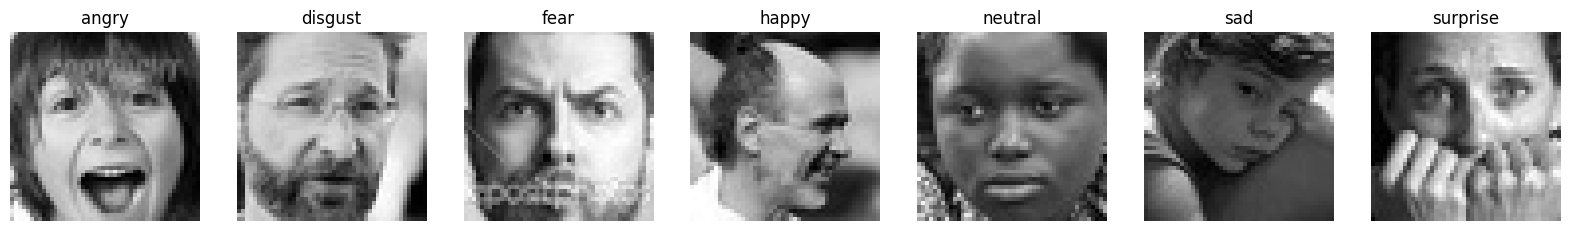

In [11]:
import kagglehub
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns


# Download dataset
file_path = kagglehub.dataset_download("msambare/fer2013")

# Create ImageDataGenerator with validation split
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create training and validation data generators
train_generator = train_datagen.flow_from_directory(
    file_path+"/train",
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=64,
    class_mode="categorical",
    subset="training",
    shuffle=True,
    seed=6
)

validation_generator = train_datagen.flow_from_directory(
    file_path+"/train",
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=64,
    class_mode="categorical",
    subset="validation",
    shuffle=False,
    seed=6
)


# Create a separate ImageDataGenerator for the test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    file_path+"/test",
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=64,
    class_mode="categorical",
    shuffle=False,
    seed=6
)


# Display one image from each class
def display_images(data_gen):
    class_names = data_gen.class_indices.keys()
    num_classes = len(class_names)
    fig, axes = plt.subplots(1, num_classes, figsize=(20, 5))
    for i, class_name in enumerate(class_names):
        img, label = data_gen.next()
        axes[i].imshow(img[0].reshape(48, 48), cmap='gray')
        axes[i].set_title(class_name)
        axes[i].axis('off')
    plt.show()

# Display images
display_images(train_generator)


In [9]:
# plot distribution of classes in the training, validation and test sets
def plot_class_distribution(generator, title):
    class_indices = generator.class_indices
    class_counts = [0] * len(class_indices)
    for _, labels in generator:
        for label in labels:
            class_counts[np.argmax(label)] += 1

    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(class_indices.keys()), y=class_counts)
    plt.title(title)
    plt.xlabel('Classes')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
# Plot class distributions
plot_class_distribution(train_generator, 'Training Set Class Distribution')
plot_class_distribution(validation_generator, 'Validation Set Class Distribution')
plot_class_distribution(test_generator, 'Test Set Class Distribution')
# Display some images from the test set
display_images(test_generator)

KeyboardInterrupt: 